In [1]:
# Suppress all warnings in the session
options(warn = -1)

In [2]:
# Install packages quietly
install.packages("MatchIt", quiet = TRUE)
install.packages("dplyr", quiet = TRUE)

package 'MatchIt' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked


In [3]:
library(MatchIt)
suppressPackageStartupMessages(library(dplyr))

In [4]:
MOCA_DemoPDDX_UPDRS_W_MatV_Only <- read.csv("MOCA_DemoPDDX_UPDRS_W_MatV_Only.csv")
OurPDDataforPM_W_MatV_Only_nandropped <- read.csv("OurPDDataforPM_W_MatV_Only_nandropped.csv")

In [5]:
# Load necessary libraries
library(MatchIt)

# Combine the datasets
combined_data <- rbind(OurPDDataforPM_W_MatV_Only_nandropped, MOCA_DemoPDDX_UPDRS_W_MatV_Only)

# Identify continuous and categorical variables
continuous_vars <- c('NP3TOT', 'PDTIME.Years.', 'AgePDDX')
categorical_vars <- c('SEX', 'MCATOT')

# Standardize the continuous variables
combined_data[continuous_vars] <- lapply(combined_data[continuous_vars], scale)

# Perform Propensity Score Matching
matching_vars <- c('NP3TOT', 'PDTIME.Years.', 'AgePDDX', 'SEX', 'MCATOT')

# Fit the propensity score model using logistic regression
psm_model <- matchit(Label ~ NP3TOT + PDTIME.Years. + AgePDDX + SEX + MCATOT, 
                     data = combined_data, 
                     method = "nearest", 
                     distance = "logit")

# Check the summary of the matching
summary(psm_model)

# Get the matched data
matched_data <- match.data(psm_model)

# View the matched data
head(matched_data)


Call:
matchit(formula = Label ~ NP3TOT + PDTIME.Years. + AgePDDX + 
    SEX + MCATOT, data = combined_data, method = "nearest", distance = "logit")

Summary of Balance for All Data:
              Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance             0.7572        0.0171          2.1653    25.3074    0.4816
NP3TOT               1.5873       -0.1121          1.2576     2.4256    0.3038
PDTIME.Years.        2.7770       -0.1961          2.1086     5.7014    0.6355
AgePDDX             -0.5413        0.0382         -0.7658     0.5677    0.1585
SEX                  0.7945        0.6132          0.4489          .    0.1814
MCATOT              27.1918       26.6847          0.1723     1.1606    0.0349
              eCDF Max
distance        0.8864
NP3TOT          0.6385
PDTIME.Years.   0.8662
AgePDDX         0.3490
SEX             0.1814
MCATOT          0.1334

Summary of Balance for Matched Data:
              Means Treated Means Control Std. Mean Diff. Var. Ra

,MCATOT,NP3TOT,PDTIME.Years.,AgePDDX,SEX,Label,distance,weights,subclass
,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>,<dbl>,<dbl>,<fct>
1,28,0.4252576,1.142027,-1.5059698,1,1,0.1018299,1,1
2,28,4.0240793,1.858731,0.1121135,1,1,0.9711914,1,12
3,29,2.9101583,1.882685,-0.6361205,1,1,0.9190282,1,23
4,27,0.6823163,2.946243,0.2419092,1,1,0.9345418,1,34
5,28,0.5966301,3.322799,-1.3262737,1,1,0.9538731,1,45
6,29,1.1964337,4.769621,-0.4651501,1,1,0.9994182,1,56


In [6]:
# Means before matching
mean_before_matching <- sapply(continuous_vars, function(var) {
  tapply(combined_data[[var]], combined_data$Label, mean, na.rm = TRUE)
})
print("Means Before Matching")
print(mean_before_matching)

# Means after matching
mean_after_matching <- sapply(continuous_vars, function(var) {
  tapply(matched_data[[var]], matched_data$Label, mean, na.rm = TRUE)
})
print("Means After Matching")
print(mean_after_matching)

[1] "Means Before Matching"
     NP3TOT PDTIME.Years.    AgePDDX
0 -0.112063    -0.1960544  0.0382147
1  1.587304     2.7769895 -0.5412876
[1] "Means After Matching"
     NP3TOT PDTIME.Years.    AgePDDX
0 0.6776211      1.256125 -0.2310394
1 1.5873037      2.776989 -0.5412876


### Evaluating the effectiveness of the matching process

**1- Balance Check:** Ensures covariates are similar between groups.

**2- Covariate Balance Tables:** Provides detailed balance statistics.

**3- Matching Quality Metrics:** Assesses the quality and quantity of matched pairs.

**4- Propensity Score Distribution:** Checks if propensity score distributions overlap.

**5- Outcome Analysis:** Evaluates treatment effects using matched data.

**6- Sensitivity Analysis:** Tests the robustness of results to unobserved confounding.

**7- Propensity Score Overlap:** Ensures there is sufficient overlap in propensity scores between groups.

In [7]:
suppressPackageStartupMessages(library(cobalt))
# 1- Balance Check Using Standardized Mean Differences:
# Get balance table
balance_table <- bal.tab(psm_model)
print(balance_table)

Balance Measures
                  Type Diff.Adj
distance      Distance   1.6794
NP3TOT         Contin.   0.6732
PDTIME.Years.  Contin.   1.0787
AgePDDX        Contin.  -0.4100
SEX             Binary   0.1918
MCATOT         Contin.   0.2235

Sample sizes
          Control Treated
All          1034      73
Matched        73      73
Unmatched     961       0



Call:
matchit(formula = Label ~ NP3TOT + PDTIME.Years. + AgePDDX + 
    SEX + MCATOT, data = combined_data, method = "nearest", distance = "logit")

Summary of Balance for All Data:
              Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance             0.7572        0.0171          2.1653    25.3074    0.4816
NP3TOT               1.5873       -0.1121          1.2576     2.4256    0.3038
PDTIME.Years.        2.7770       -0.1961          2.1086     5.7014    0.6355
AgePDDX             -0.5413        0.0382         -0.7658     0.5677    0.1585
SEX                  0.7945        0.6132          0.4489          .    0.1814
MCATOT              27.1918       26.6847          0.1723     1.1606    0.0349
              eCDF Max
distance        0.8864
NP3TOT          0.6385
PDTIME.Years.   0.8662
AgePDDX         0.3490
SEX             0.1814
MCATOT          0.1334

Summary of Balance for Matched Data:
              Means Treated Means Control Std. Mean Diff. Var. Ra

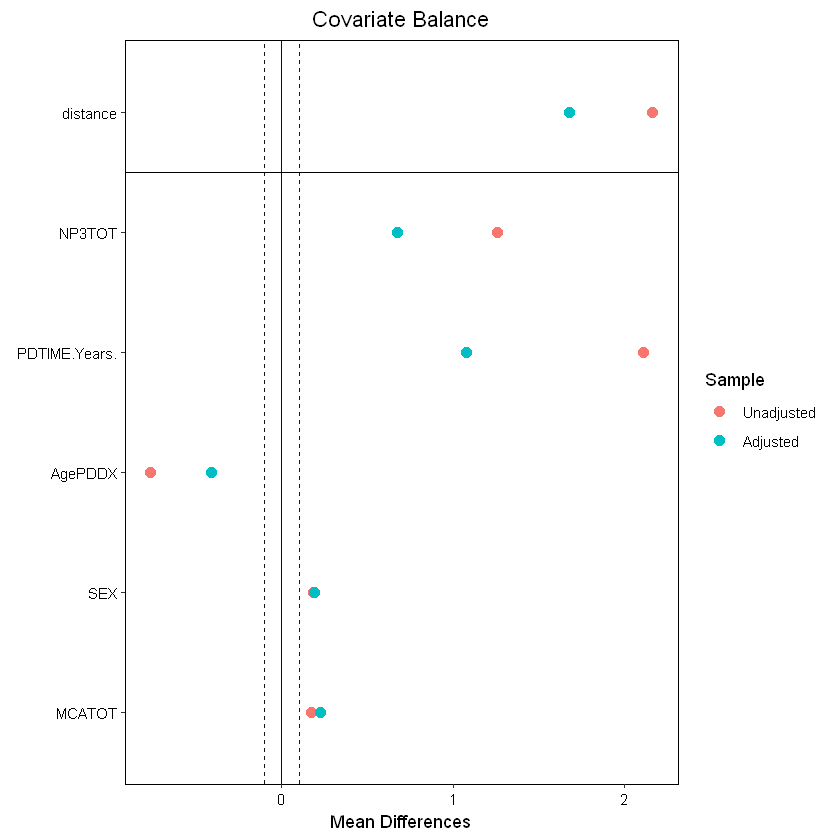

In [8]:
# 2- Covariate Balance Tables and Plot:
summary(psm_model)
# Create a Love plot for balance assessment
love.plot(psm_model, threshold = 0.1)

In [9]:
# 3- Matching Quality Metrics:
# Evaluate the number of matched pairs
matched_pairs <- sum(!is.na(matched_data$weights))
print(matched_pairs)

[1] 146


To identify the units, use first mouse button; to stop, use second.


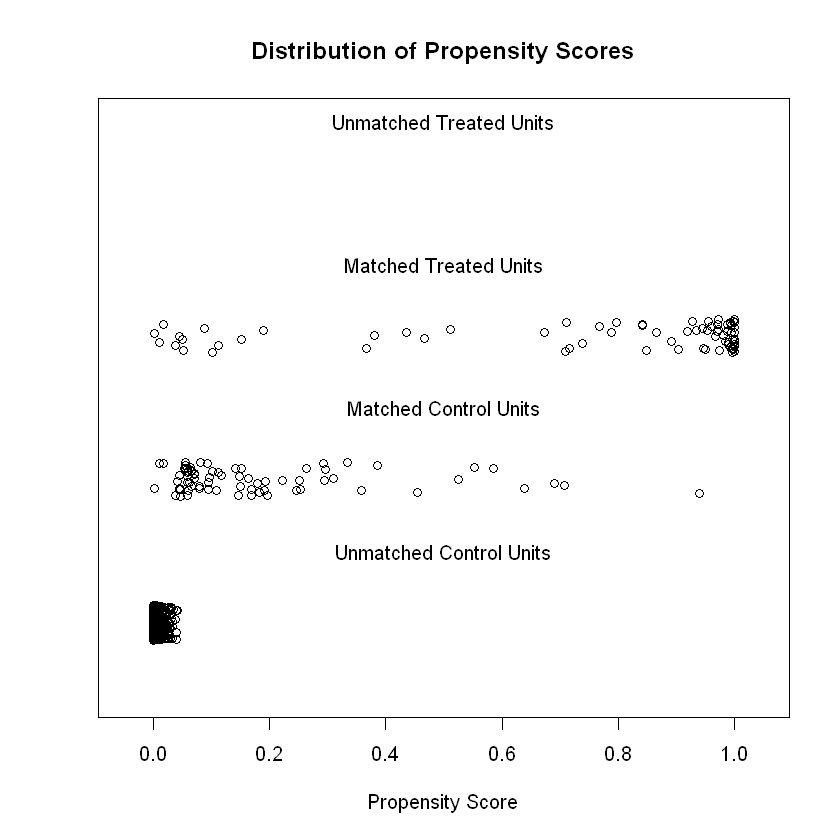

In [10]:
# 4- Balance plot for continuous variables
plot(psm_model, type = "jitter")

In [11]:
# 5- Estimate treatment effect (outcome analysis)
outcome_model <- lm(MCATOT ~ Label, data = matched_data)
summary(outcome_model)


Call:
lm(formula = MCATOT ~ Label, data = matched_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5342  -1.1918   0.8082   1.8082   3.4658 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.5342     0.3754  70.681   <2e-16 ***
Label         0.6575     0.5309   1.239    0.218    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.207 on 144 degrees of freedom
Multiple R-squared:  0.01054,	Adjusted R-squared:  0.003669 
F-statistic: 1.534 on 1 and 144 DF,  p-value: 0.2175


### Assesing Propensity score Overlap using different methods

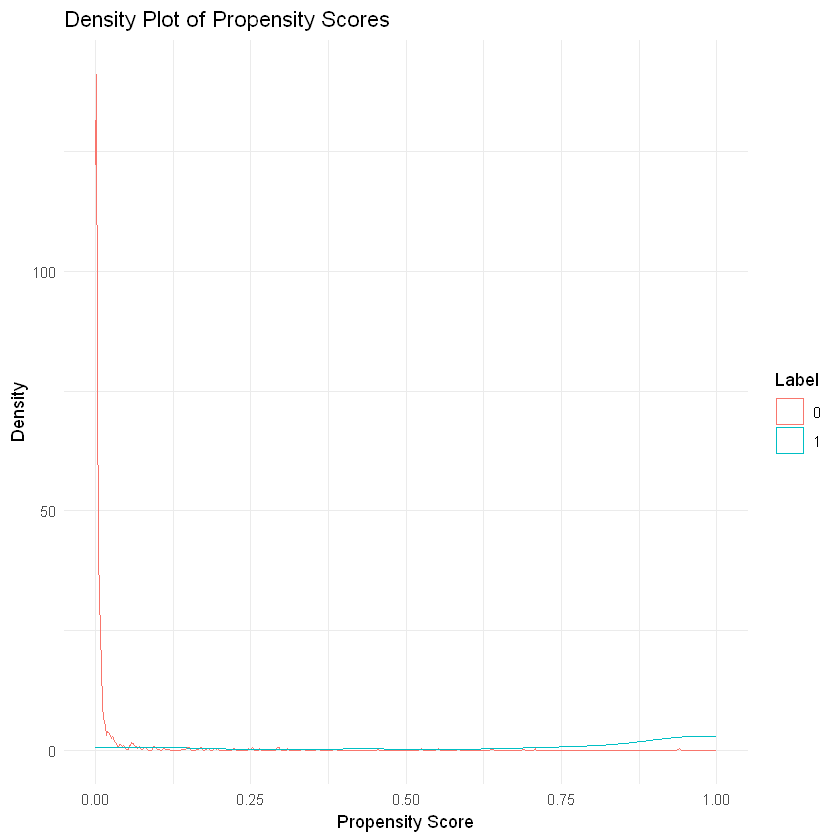

In [12]:
library(ggplot2)
# 7- Assess Propensity score Overlap

# Get the propensity scores from the matching model
ps_scores <- psm_model$distance

# Add propensity scores to the combined_data for visualization
combined_data$propensity_score <- ps_scores

# Add treatment label for visualization
combined_data$Label <- as.factor(combined_data$Label)

# Plot the propensity score distributions for treatment and control groups
ggplot(combined_data, aes(x = propensity_score, color = Label)) +
  geom_density() +
  labs(title = "Density Plot of Propensity Scores",
       x = "Propensity Score",
       y = "Density") +
  theme_minimal()

In [13]:
# Summary statistics for propensity scores by treatment group
summary_stats <- aggregate(propensity_score ~ Label, data = combined_data, function(x) c(mean = mean(x), sd = sd(x), min = min(x), max = max(x)))
print(summary_stats)

  Label propensity_score.mean propensity_score.sd propensity_score.min
1     0          1.713833e-02        6.794420e-02         5.536646e-05
2     1          7.572462e-01        3.418035e-01         1.647040e-03
  propensity_score.max
1         9.389386e-01
2         9.999943e-01


In [14]:
# Calculate overlap
treatment_scores <- combined_data$propensity_score[combined_data$Label == 1]
control_scores <- combined_data$propensity_score[combined_data$Label == 0]

# Calculate ranges
range_treatment <- range(treatment_scores)
range_control <- range(control_scores)

# Calculate overlap range
overlap_min <- max(range_treatment[1], range_control[1])
overlap_max <- min(range_treatment[2], range_control[2])

# Proportion of overlap
if (overlap_max > overlap_min) {
  overlap_proportion <- (overlap_max - overlap_min) / (range_treatment[2] - range_treatment[1])
} else {
  overlap_proportion <- 0
}

print(paste("Overlap proportion:", overlap_proportion))


[1] "Overlap proportion: 0.938843295635648"


In [15]:
# Define common support range
common_support_min <- max(range_treatment[1], range_control[1])
common_support_max <- min(range_treatment[2], range_control[2])

# Calculate proportions within common support
prop_treatment_within <- mean(treatment_scores >= common_support_min & treatment_scores <= common_support_max)
prop_control_within <- mean(control_scores >= common_support_min & control_scores <= common_support_max)

print(paste("Proportion of treated within common support:", prop_treatment_within))
print(paste("Proportion of control within common support:", prop_control_within))


[1] "Proportion of treated within common support: 0.465753424657534"
[1] "Proportion of control within common support: 0.607350096711799"


In [16]:
install.packages("densityClust", quiet= TRUE)
suppressPackageStartupMessages(library(densityClust))

# Compute density estimates
density_treatment <- density(treatment_scores)
density_control <- density(control_scores)

# Compute overlap coefficient
overlap_coeff <- sum(pmin(density_treatment$y, density_control$y)) / sum(density_treatment$y + density_control$y)
print(paste("Density overlap coefficient:", round(overlap_coeff, 2)))

package 'densityClust' successfully unpacked and MD5 sums checked
[1] "Density overlap coefficient: 0.02"
